In [1]:
################### standard ###################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

################### allow import from src ###################
import sys, os
sys.path.append(os.path.abspath(".."))

################### pipeline step ###################
import src.data_prep as data
import src.models.NN as NN
import src.config.feature_def as feature_def
import src.models.utils as utils

In [2]:
monthly = data.prepare_monthly_dataset("../data/Major_Crime_Indicators_Open_Data.csv")
feature_cols = feature_def.FEATURE_NSI_3M
target_col = feature_def.TARGET_COL

In [3]:
layer_configs = [
    (32,), (64,), (128,),
    (64, 32), (128, 64), (256, 128),
    (64, 32, 16), (128, 64, 32), (256, 128, 64)
]

activations = ['relu', 'logistic', 'tanh']

results, best = NN.nn_hparam_search(monthly, feature_cols, target_col,
                                 layer_configs, activations)
best

{'layers': (64, 32),
 'activation': 'logistic',
 'R2': 0.8138867432404552,
 'RMSE': 0.05582259691944287,
 'MAE': 0.04147580823250085}

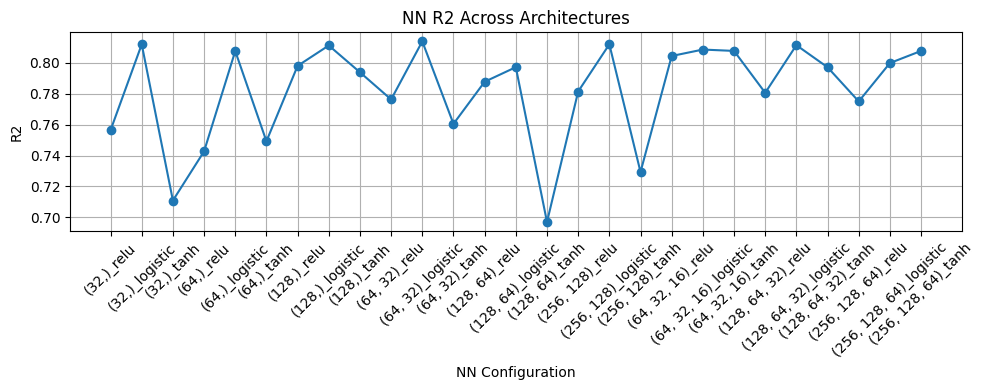

In [4]:
NN.plot_nn_r2(results)